`pip install scipy matplotlib colorama plotly peakdetect`

In [33]:
import pandas 
import scipy.signal as scipy
from matplotlib import pyplot as plt
from datetime import datetime
from colorama import Fore
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from peakdetect import peakdetect



Przypisywanie nazwy znaczącym kolumnom. Jest to potrzebne ze względu na brak nagłówków w pliku `.csv`.

In [34]:
CSV_YEAR_COLUMN =   0
CSV_MONTH_COLUMN =  1
CSV_DATA_COLUMN =   3


Odczytanie danych z pliku

In [35]:
data = pandas.read_csv("dane.csv", sep=";", header=None)
print(data.head(10))

      0   1         2      3    4  5  6
0  1749   1  1749.042   96.7 -1.0 -1  1
1  1749   2  1749.123  104.3 -1.0 -1  1
2  1749   3  1749.204  116.7 -1.0 -1  1
3  1749   4  1749.288   92.8 -1.0 -1  1
4  1749   5  1749.371  141.7 -1.0 -1  1
5  1749   6  1749.455  139.2 -1.0 -1  1
6  1749   7  1749.538  158.0 -1.0 -1  1
7  1749   8  1749.623  110.5 -1.0 -1  1
8  1749   9  1749.707  126.5 -1.0 -1  1
9  1749  10  1749.790  125.8 -1.0 -1  1


<AxesSubplot:>

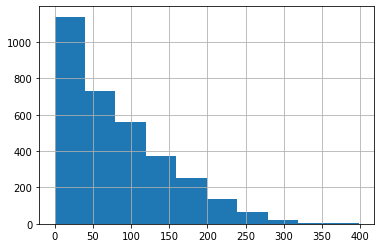

In [36]:
data[CSV_DATA_COLUMN].hist()

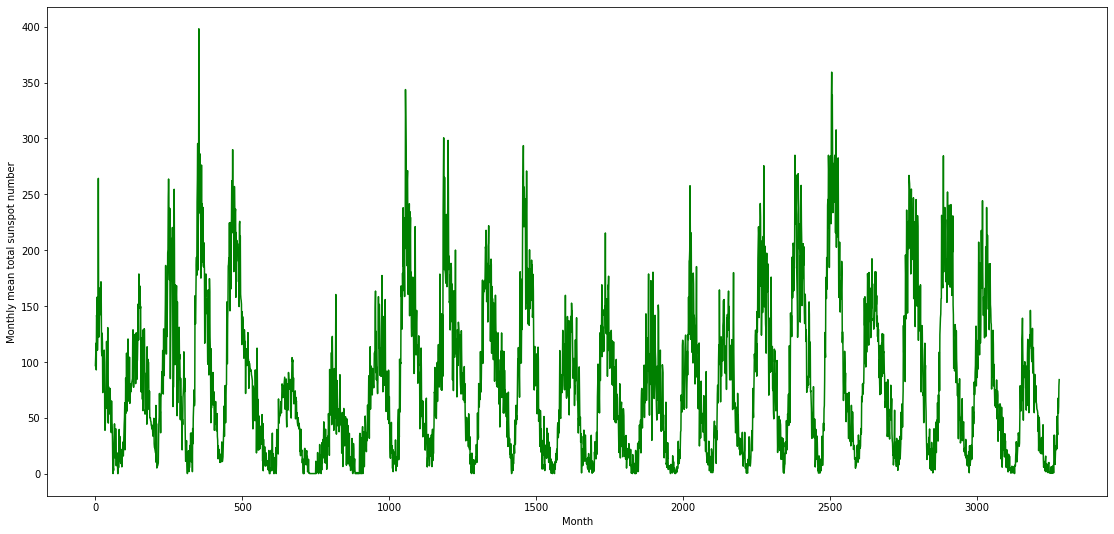

In [37]:
plt.figure(figsize=(19,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.plot(data[CSV_DATA_COLUMN], c="green")


<AxesSubplot:>

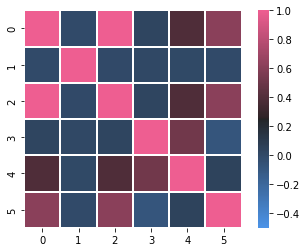

In [38]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5 , cmap=cmap, square=True, linewidths=.2)

In [39]:
peaks = scipy.find_peaks(data[CSV_DATA_COLUMN], height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)

In [40]:
time_series = data[CSV_DATA_COLUMN].mul(-1.0)

indices = scipy.find_peaks(time_series, width=24, distance=34, prominence=30)[0]
time_series = data[CSV_DATA_COLUMN]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))


fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
    ),
    name='Detected Minimum'
))

fig.show()

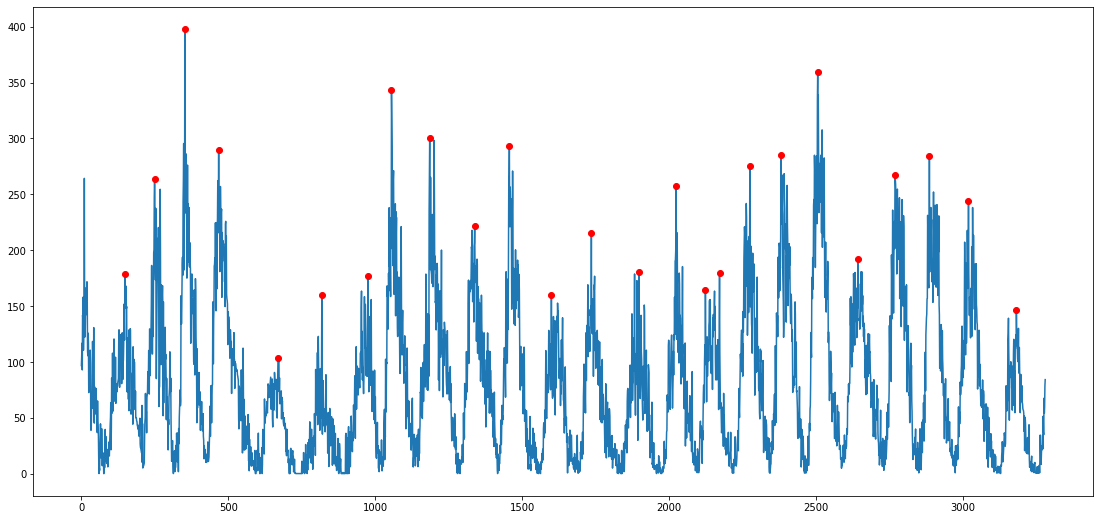

In [41]:
time_series = data[CSV_DATA_COLUMN]

peaks = peakdetect(time_series, lookahead=40) 

higherPeaks = np.array(peaks[0])
plt.figure(figsize=(19,9))

plt.plot(time_series)
plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')

period = ~11 yrs = ~132 months

In [42]:
periodFirst = data[CSV_DATA_COLUMN][76:209]
periodSecond = data[CSV_DATA_COLUMN][209:313]
periodThird = data[CSV_DATA_COLUMN][313:424]
periodFourth = data[CSV_DATA_COLUMN][424:594]
periodFifth = data[CSV_DATA_COLUMN][593:707]

In [43]:
pandas.DataFrame.describe(periodFirst)

count    133.000000
mean      70.796241
std       41.562821
min        0.000000
25%       40.000000
50%       67.000000
75%      100.300000
max      178.700000
Name: 3, dtype: float64

In [44]:
pandas.DataFrame.describe(periodSecond)

count    104.000000
mean     102.329808
std       63.607180
min        5.000000
25%       54.050000
50%       91.100000
75%      150.250000
max      263.700000
Name: 3, dtype: float64

In [45]:
pandas.DataFrame.describe(periodThird)

count    111.000000
mean     111.154955
std       87.516840
min        0.000000
25%       37.300000
50%       88.300000
75%      178.100000
max      398.200000
Name: 3, dtype: float64

In [46]:
pandas.DataFrame.describe(periodFourth)

count    170.000000
mean      99.337647
std       75.818168
min        0.000000
25%       30.775000
50%       87.750000
75%      154.700000
max      290.000000
Name: 3, dtype: float64

In [47]:
pandas.DataFrame.describe(periodFifth)

count    114.000000
mean      48.003509
std       29.014671
min        0.000000
25%       20.000000
50%       50.000000
75%       72.925000
max      103.800000
Name: 3, dtype: float64